<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Machine Learning Foundation***

## ***Distance and the Curse of Dimensionality DEMO***

$ \ $

----

## ***Installing Required Libraries***

$ \ $

We recommend you import all required libraries. 

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

In [3]:
def zip(list_1, list_2):
  lista = []
  if (len(list_1) == len(list_2)):
    for i in range(len(list_1)):
      lista.append((list_1[i], list_2[i]))
  return lista

$ \ $

----

## ***Objetives***

After completing this lab you will be able to:

* Gain understanding of why observations are far apart in high-dimensional space.

* See an example of how adding dimensions degrades model performance for classification.

* Learn how to fight the curse of dimensionality in your modeling projects.

$ \ $

-----

## ***Curse of Dimensionality***

In high-dimensional space, points tend to be far apart. This impacts data analysis. Intuitively, clustering is difficult when points are far away from each other:

$ \ $

$$\color{lightblue}{\text{If my next nearest neighbor is very far away, does it still make sense to call it my neighbor?}}$$

$ \ $

This notebook will show why high-dimensional space leads to sparse data. 

$ \ $ 

-----

## ***A circle inside a square***

$ \ $

Let's start by drawing a unit circle inside of a square.

In [4]:
def make_circle(point = 0):

    # creamos una nueva imagen donde realizaremos un plot
    fig = plt.gcf()

    # creamos los ejes del plot 
    ax = fig.add_subplot(111, aspect = 'equal')

    # describimos el circulo 
    circulo = plt.Circle((0,0), 1, alpha = 0.5)
    fig.gca().add_artist(circulo)

    # creamos el punto (0,0)
    ax.scatter(0, 0, s = 10, color = "black")

    #  creamos una particion de [0,1] con 100 numeros
    x = np.linspace(0, 1, 100)
    
    # creamos un array con 100 ceros
    y = np.zeros(100)

    # creamos un conjunto de puntos (x,0) en el plano cartesiano con x uno de los puntos en el intervalo [0,1] escogidos anteriormente
    ax.plot(x, y, color = "black")

    # describimos la letra r en las coordenadas (0.4, 0.1)
    ax.text(0.4, 0.1, "r", size = 48)

    # establecemos los limites de acotamiento del eje x
    ax.set_xlim(left = -2, right = 2)

    # establecemos los limites de acotamiento del eje y
    ax.set_ylim(bottom = -2, top = 2)

    # establecemos la etiqueta del eje x
    plt.xlabel("Covariate A")

    # establecemos la etiqueta del eje y
    plt.ylabel("Covariate B")

    # describimos el titulo del plot
    plt.title("Unit Circle")
    
    # realizamos este condicional si (point = 1) o (point = True)
    # point = 0 es equivalente a falso
    if point:

        # creamos un texto "Far away" en la posicion (0.55, 0.9) con color purpura
        ax.text(0.55, 0.9, "Far away", color = "purple")

        # mostramos el punto (0.85, 0.85) con color purpura
        ax.scatter(0.85, 0.85, s = 10, color = "purple")

        # mostramos el resultado en pantalla
        return plt.show()

    # en el caso en que (point != 1) y (point != True)
    else: 

        # mostramos en pantalla la imagen creada
        return plt.show()

Each axis is a different covariate. Imagine we've standard scaled our data, so they're centered on zero. This means that the average for each covariate is now zero, or the center of our circle. Points that our outside the unit circle would be harder to classify because the values of their covariates are far from the mean.

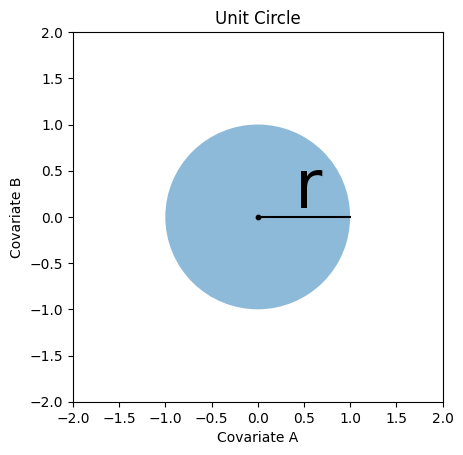

In [5]:
make_circle()

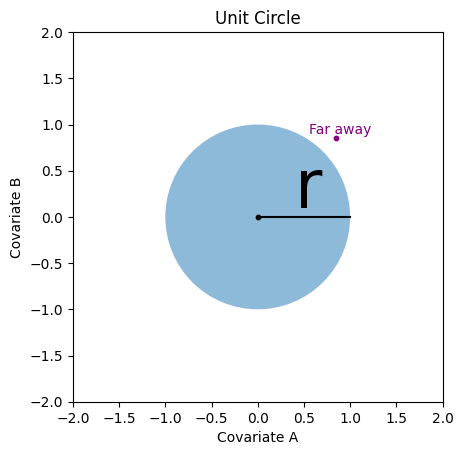

In [6]:
make_circle(1)

$ \ $ 

----

## ***How much of the square is outside the circle? And the cube outside the sphere, etc.***

$ \ $

We have concluded that our purple point above would be hard to classify because it's far away from the rest of our observations, but:

$ \ $

$$\color{lightblue}{\text{What percentage of our points in the square are outside of the circle, and thus "far away"?}}$$

$ \ $

If a square has length $2r$ and area $(2r)^2$, then the percentage of the square outside the circle is: 

$ \ $

$$\color{lightblue}{\text{Area outside the circle}(r) = \frac{(2r)^2 - \pi r^{2}}{(2r)^2} = 1 - \frac \pi 4 \approx 21 \%}$$


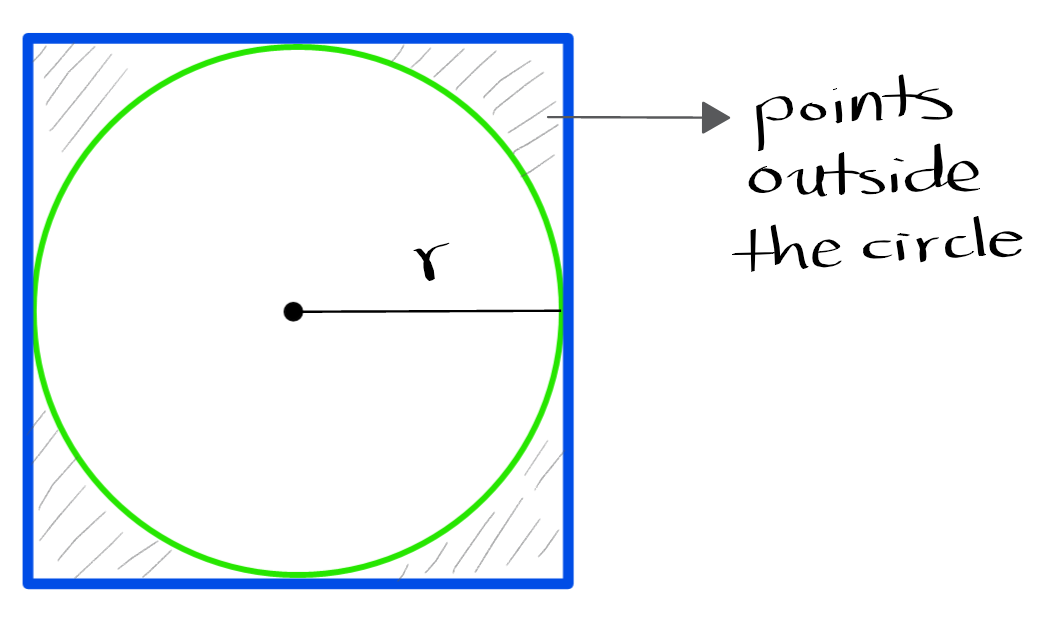

$ \ $

$$\color{lightblue}{\text{What percentage of our points in the cube are outside of the sphere, and thus "far away"?}}$$

$ \ $

If a cube has length $2r$ and area $(2r)^3$, then the percentage of the square outside the cube is: 

$ \ $

$$\color{lightblue}{\text{Volume outside the circle}(r) = \dfrac{(2r)^3 - \frac{4 \pi r^{3}}{3}}{(2r)^3} = 1 - \frac{\pi}{6}\approx 47 \%}$$

$ \ $

To illustrate, we will use [matplotlib's 3-D axis](https://matplotlib.org/3.2.1/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) which allows the '3d' projection, as well as the [itertools](https://docs.python.org/3/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) library, which offers a number of efficient tools for looping and combining lists. We will use the [cartesian product](https://docs.python.org/2/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#itertools.product)  and [combinations](https://docs.python.org/2/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#itertools.combinations) (unique subsequences) functions. 

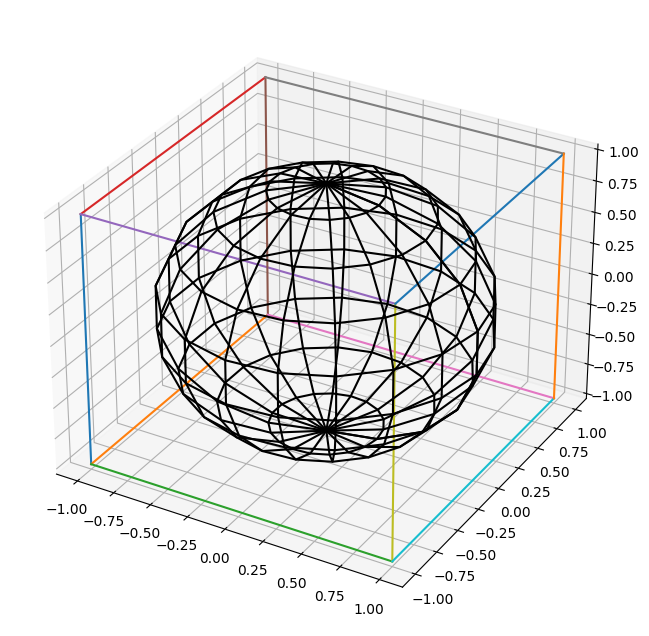

In [7]:
# creamos una figura para realizar un plot en R^3
fig = plt.figure(figsize = (8, 8))
 
# creamos los ejes del espacio R^3
ax = plt.axes(projection = "3d")

# creamos una lista con los elementos -1 y 1 --------> con el objetivo de describir el intervalo [-1, 1]
r = [-1, 1]

# creamos un array con elementos de la forma [+/- 1, +/- 1, +/- 1] -------> estos puntos describen los puntos medios de las caras del cubo
cube = np.array(list(product(r,r,r)))

# combinations(cube, 2) toma la lista cube y forma todas las posibles combinaciones de 2 elementos 
for x, y in combinations(cube, 2):

    # si dos puntos de la forma [+/- 1, +/- 1, +/- 1] tienen distancia en L^1 igual a 2, entonces 
    if np.sum(np.abs(x-y))  == 2:

        # se dibuja el segmento de recta que va de x hasta y
        ax.plot3D(*zip(x,y))

#  creamos los parametros que describen el angulo theta y phi de las coordenadas esfericas
u, v = np.mgrid[0 : 2*(np.pi) : 20j, 
                0 :   (np.pi) : 10j]

# describimos una parametrizacion para la esfera
# x = cos(u) sin(v)
x = np.cos(u)*np.sin(v)

# y = sin(u) sin(v)
y = np.sin(u) * np.sin(v)

# z = cos(v)
z = np.cos(v)

# describimos una estructura alambrica de los puntos (x,y,z) que describen la esfera
ax.plot_wireframe(x, y, z, color = "black");

$ \ $

$$\color{lightblue}{\text{What percentage of our points in the n -cube are outside of the n-sphere, and thus "far away"?}}$$

$ \ $

There is a formula that describes the $n$ - dimensional volumen of a sphere. But we don't write it. 

$ \ $

-----

## ***Example***

$ \ $

$(1)$ We create two functions:

* The norm function that calculate the euclidean norm of different vectors given in an array.

* A boolean function that says us if a vector belong to $B(0;1)= \{x \in \mathbb{R}^{n}: ||x||< 1\}$.

In [8]:
def norm(x): 
    ''' Measure the distance of each point from the origin.    
        Input: Sample points, one point per row
        Output: The distance from the origin to each point
    '''
    
    # si x = np.array([[x_1, ...,x_n]]), entonces realizamos la suma de este array
    suma = (x**2).sum(1)

    # obtenemos la raiz de la suma anterior
    raiz = np.sqrt(suma)

    # la funcion devuelve la raiz obtenida
    return raiz 

In [9]:
def in_the_ball(x): 
    ''' Determine if the sample is in the circle.     
        Input: Sample points, one point per row
        Output: A boolean array indicating whether the point is in the ball
    '''

    # la fucnion devuelve un verdadero o un falso si la norma anterior es menor que 1. Es decir que se encuentra en la bola unitaria
    return norm(x) < 1 

$ \ $

$(2)$ We describe a bunch of random points in $\mathbb{R}^{3}$ with coordinates in the interval $[0,1]$, then we measure how far away from the origin they are.

In [10]:
# describimos 5 elementos aleatorios en un array de la forma [a,b] con a,b in [0,1]
sample_data = np.random.sample((5,3))

# describimos la norma de la data muestral
norma = norm(sample_data)

# describimos el valor de verdad de cada uno de los elementos de la data muestral.
valor_verdad = in_the_ball(sample_data)

# describimos una iteracion sobre norma<->valor
for x, y in zip(norma, valor_verdad):

    # mostramos en pantalla la norma del correspondiente elemento y su valor de verdad deacuerdo a la pregunta: el punto esta en la bola unitaria?
    print("Norm = ", x.round(2), "; Is it in the unit ball?", y, "\n")

Norm =  0.82 ; Is it in the unit ball? True 

Norm =  0.71 ; Is it in the unit ball? True 

Norm =  0.91 ; Is it in the unit ball? True 

Norm =  1.09 ; Is it in the unit ball? False 

Norm =  1.49 ; Is it in the unit ball? False 



$ \ $

$(3)$ We create a function that describes a bunch of random points in $\mathbb{R}^{n}$ with coordinates in the interval $[0,1]$, then we measure how far away from the origin they are (outside of $B(0;1)=\{x \in \mathbb{R}^{n}: ||x||< 1\}$).

In [11]:
def what_percent_of_the_ncube_is_in_the_nball(d_dim, sample_size = 10**4):

    # describimos el tamaño del array
    m = sample_size
    n = d_dim
    shape = m, n

    # creamos una lista vacia 
    lista = []

    # realizamos una iteracion sobre la lista [0,...,99]
    for i in range(100):

       # describimos m elementos aleatorios en un array de la forma [a_1,..,a_n] con a_i in [0,1]
       muestra = np.random.sample(shape)

       # obtenemos el promedio -----> esto es basicamente sumar los valores que son True como 1, y luego dividir por la cantidad de datos
       promedio = in_the_ball(muestra).mean()

       # tomamos el promedio y lo pegamos a nuestra lista
       lista.append(promedio)

    # convertimos nuestra lista en un array
    data = np.array(lista)

    # la funcion devuelve el promedio de nuestro array
    return data.mean()

$ \ $

$(4)$ We use the previous function.

In [12]:
# creamos una lista con los numeros {2,...,14}
dimensions = range(2,15)

# tomamos la funcion anterior y obtenemos un conjunto de datos transformados
# A -------> T(A)= rango(T)
transformacion = map(what_percent_of_the_ncube_is_in_the_nball, dimensions)

# transformamos el rango a una lista 
lista = list(transformacion)

# transformamos la lista en un array
data = np.array(lista)

# mostramos los resultados de nuestra transformacion
# (x, T(x))
for dimension, percent in zip(dimensions, data):
    print("Dimension = ", dimension)
    print("Percent in ball = ", percent)
    print("\n")

Dimension =  2
Percent in ball =  0.7851620000000001


Dimension =  3
Percent in ball =  0.523443


Dimension =  4
Percent in ball =  0.30888499999999997


Dimension =  5
Percent in ball =  0.164404


Dimension =  6
Percent in ball =  0.080822


Dimension =  7
Percent in ball =  0.037191999999999996


Dimension =  8
Percent in ball =  0.015799999999999998


Dimension =  9
Percent in ball =  0.006373


Dimension =  10
Percent in ball =  0.0024560000000000003


Dimension =  11
Percent in ball =  0.0008610000000000001


Dimension =  12
Percent in ball =  0.000327


Dimension =  13
Percent in ball =  0.000101


Dimension =  14
Percent in ball =  3.1e-05




$ \ $

$(5)$ Let's plot the above percentages.

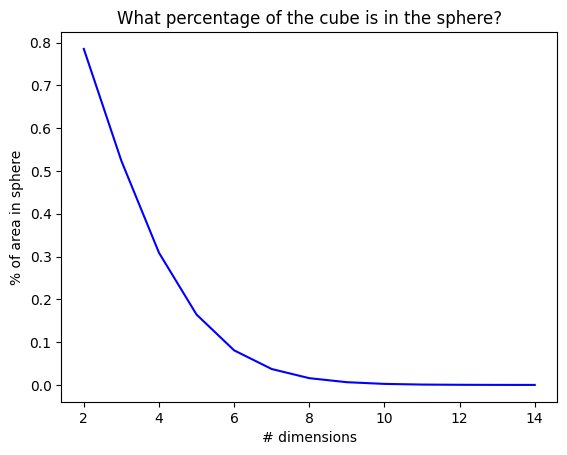

In [13]:
# describimos un plot (x,y)
x = dimensions
y = data
plt.plot(x, y, color = 'blue')

# describimos la etiqueta del eje x
plt.xlabel("# dimensions")

# describimos la etiqueta del eje y
plt.ylabel("% of area in sphere")

# describimos el titulo del plot
plt.title("What percentage of the cube is in the sphere?")

# mostramos la imagen en pantalla
plt.show()

$ \ $

-----

## ***Measuring the distance from the center of the cube to the nearest point***

$ \ $

Let's continue with our drawing of random points in the cube. This time, we'll draw a bunch of points, then measure the distance of all the points to the center of the cube to see how close the closest point is to the center. If we find out that the closest point is far from the center in high dimensions, that gives us more evidence that increasing dimensions will make it harder to classify our data properly.

$ \ $

$(1)$ We create two functions that take a collection of random vectors in $\mathbb{R}^{n}$ and return the distance to $O=(0,\dots,0)$ and some statistical descriptions.

In [14]:
# En esta funcion creamos un conjunto de vectores aleatorios centrados en R^n y describimos la distancia de estos puntos al origen
def get_min_distance(dimension, sample_size = 10**3):

    ''' Sample some random points and find the closet 
    of those random points to the center of the data '''

    # describimos el tamaño
    # m = sample_size
    # n = dimension
    shape = (sample_size, dimension)

    # creamos un conjunto con m --> n-tuplas
    datos = np.random.sample(shape)

    # centramos nuestros datos, ya que todos nuestros datos estan el intervalo [0,1]
    points = datos - 0.5  

    # obtenemos la norma de nuestros vectores y calculamos el mas cercano al origen o el vector con norma mas pequeña
    return np.min(norm(points))

In [15]:
def estimate_closest(dimension):

    ''' For a given dimension, take a random sample in that dimension and then find 
        that sample's closest point to the center of the data. 
        Repeat 100 times for the given dimension and return the min/max/mean 
        of the distance for the nearest point. '''

    # creamos una lista con 100 resultados de la funcion anterior y luego convertimos esta lista en un array
    data = np.array([get_min_distance(dimension) for x in range(100)])

    # la funcion devuelve el promedio, maximo y minimo de las distancias obtenidas con la funcion creada anteriormente
    mean = data.mean()
    min = data.min()
    max = data.max()
    return mean, min, max

$ \ $

$(2)$ We use the previous functions to get a set of random variables between $[-0.5,0.5]$ and later get some statistical values.

In [16]:
# creamos una lista con los numeros 2,3,4,....,99
dimensions = range(2, 100)

# usamos la funcion T = "estimate_closest" sobre el conjunto A = "dimensions" ------> para obtener T(A)
rango = map(estimate_closest, dimensions)

# tomamos el rango y lo escribimos en una lista
lista = list(rango)

# tomamos la lista y la escribimos como un array
min_distance_data = np.array(lista)

# mostramos los resultados en pantalla
print("For dimension 6: ", estimate_closest(6))

For dimension 6:  (0.2294852006884354, 0.10751005667569537, 0.296216058842132)


$ \ $

$(3)$ Plot the min/max/mean of the closest point for each dimension using sampling.

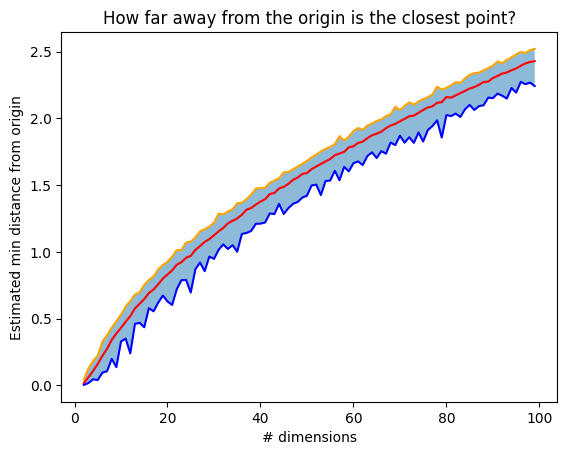

In [17]:
# describimos la data que usaremos para realizar los plots
x = dimensions
y_0 = min_distance_data[:, 0]
y_1 = min_distance_data[:, 1]
y_2 = min_distance_data[:, 2]

# describimos los plots
plt.plot(x, y_0, color = 'red')
plt.plot(x, y_1, color = 'blue')
plt.plot(x, y_2, color = 'orange')

# esta funcion rellena el espacio entre las curvas y_1 y y_2
plt.fill_between(x, y_1, y_2, alpha = 0.5)

# describimos las etiquetas del eje x
plt.xlabel("# dimensions")

# describimos las etiquetas del eje y
plt.ylabel("Estimated min distance from origin")

# describimos el titulo para el plot
plt.title("How far away from the origin is the closest point?"); 

$ \ $ 

-----

## ***How to fight the curse of dimensionality***

$ \ $ 

The curse (maldicion) of dimensionality is a common hurdle (obstaculo) in real-world predictive modeling. We've already seen this in our bag-of-words approach to $NLP$ (natural language processing) and is natural to do the following question:

$ \ $

$$\color{lightblue}{\text{How can we create good models in cases where our data is of high dimensionality?}}$$ 

$ \ $

We need to do the following things:

* $\color{lightblue}{\text{Feature selection:}}$ Use domain knowledge to reduce the number of features included in the model.

* $\color{lightblue}{\text{Feature extraction:}}$ Use dimensionality reduction techniques (e.g. Principal Component Analysis - $PCA$) to transform the raw data into a lower number of features that preserve (most of) the variability in the data.

We'll talk more about Principal Component Analysis ($PCA$) next.

$ \ $

----

## ***How does high dimensionality affect model performance?***

$ \ $

We'll test model performance (classification accuracy) by creating some random data for classification, one set with a low number of features and another with a very high number of features. We'll then compare their performance using the same classification algorithm.

$ \ $

$(1)$ Create a dataset with two features.



In [18]:
# Generamos un problema de clasificación aleatorio de n - clases. Inicialmente, esto crea grupos de puntos normalmente distribuidos (std = 1) sobre los vértices de un hipercubo bidimensional con lados de longitud 2 * class_sepy asigna un número igual de grupos a cada clase. Introduce la interdependencia entre estas características y agrega varios tipos de ruido adicional a los datos.
X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, random_state = 1, n_clusters_per_class = 2)

# RandomState expone una serie de funciones para generar números aleatorios extraídos de una coleccion de distribuciones de probabilidad.
rng = np.random.RandomState(2)

# actualizamos nuestra data X
X = X + 2 * rng.uniform(size = X.shape)

# creamos un modelo escalador estandar
st = StandardScaler()

# actualizamos nuestro conjunto de datos X
# X ------> T(X) y actualizamos X por T(X)
X = st.fit_transform(X)

# separamos nuestro conjunto de datos en datos de entrenamiento y datos de prueba con
# data de prueba = 0.4
# data de entrenamiento = 0.6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)


In [19]:
# creamos un modelo clasificador de arboles 
DT =  DecisionTreeClassifier()

# entrenamos el modelo anterior con la data de entrenamiento
DT.fit(X_train, y_train)

# mostramos el valore score del modelo entrenado DT respecto a la data de prueba
score = DT.score(X_test, y_test)

In [20]:
print("Score from two-feature classifier: ", score)

Score from two-feature classifier:  0.875


$ \ $

$(2)$ Now we repeat the previous exercise using $200$ features.

In [21]:
# Generamos un problema de clasificación aleatorio de n - clases. Inicialmente, esto crea grupos de puntos normalmente distribuidos (std = 1) sobre los vértices de un hipercubo bidimensional con lados de longitud 2 * class_sepy asigna un número igual de grupos a cada clase. Introduce la interdependencia entre estas características y agrega varios tipos de ruido adicional a los datos.
X, y = make_classification(n_features = 200, n_redundant = 0, n_informative = 200, random_state = 1, n_clusters_per_class = 2)

# RandomState expone una serie de funciones para generar números aleatorios extraídos de una coleccion de distribuciones de probabilidad.
rng = np.random.RandomState(2)

#  actualizamos nuestra data X
X = X + 2 * rng.uniform(size = X.shape)

# creamos un modelo escalador estandar
st = StandardScaler()

# actualizamos nuestro conjunto de datos X
# X ------> T(X) y actualizamos X por T(X)
X = st.fit_transform(X)

# separamos nuestro conjunto de datos en datos de entrenamiento y datos de prueba con
# data de prueba = 0.4
# data de entrenamiento = 0.6
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# creamos un modelo clasificador de arboles 
DT =  DecisionTreeClassifier()

# entrenamos el modelo anterior con la data de entrenamiento
DT.fit(X_train, y_train)

# mostramos el valore score del modelo entrenado DT respecto a la data de prueba
score = DT.score(X_test, y_test)


In [22]:
print("Score from 200-feature classifier: ", score)

Score from 200-feature classifier:  0.575


 Here we see that adding additional features, even if informative, can lead to worse model performance (due to increased overfitting of training data).

$ \ $ 

----

## ***Comparing accuracy of classification against number of features***

$ \ $ 

Let's see what happens if we keep adding features to our classification problem. We'll hold the number of classes at three in order to see how the curse of dimensionality hurts our model performance.

In [23]:
# creamos una lista vacia
scores = []

# realizamos una particion del intervalo [50, 4000]
numeros = np.linspace(50, 4000, 50, dtype = 'int')

# realizamos una iteracion sobre el array numeros descrito anteriormente
for t in numeros:

    # Generamos un problema de clasificación aleatorio de n - clases. Inicialmente, esto crea grupos de puntos normalmente distribuidos (std = 1) sobre los vértices de un hipercubo bidimensional con lados de longitud 2 * class_sepy asigna un número igual de grupos a cada clase. Introduce la interdependencia entre estas características y agrega varios tipos de ruido adicional a los datos.
    X, y = make_classification(n_features = t, n_redundant = 0, random_state = 1, n_clusters_per_class = 1, n_classes = 3)

    # RandomState expone una serie de funciones para generar números aleatorios extraídos de una coleccion de distribuciones de probabilidad.
    rng = np.random.RandomState(2)

    #  actualizamos nuestra data X
    X = X + 2 * rng.uniform(size = X.shape)

    # creamos un modelo escalador estandar
    st = StandardScaler()

    # actualizamos nuestro conjunto de datos X
    # X ------> T(X) y actualizamos X por T(X)
    X = st.fit_transform(X)

    # separamos nuestro conjunto de datos en datos de entrenamiento y datos de prueba con
    # data de prueba = 0.4
    # data de entrenamiento = 0.6
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

    # creamos un modelo clasificador de arboles 
    DT =  DecisionTreeClassifier()

    # entrenamos el modelo anterior con la data de entrenamiento
    DT.fit(X_train, y_train)

    # mostramos el valore score del modelo entrenado DT respecto a la data de prueba
    score = DT.score(X_test, y_test)

    # pegamos nuestro puntaje a la lista anterior
    scores.append(score)


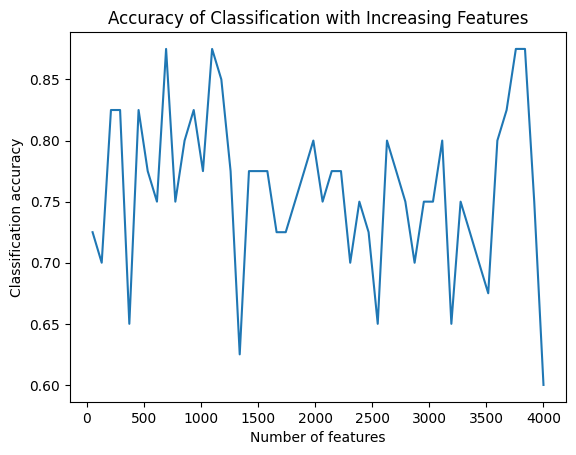

In [24]:
# realizamos una particion del intervalo [50, 4000]
x = np.linspace(50, 4000, 50, dtype = 'int')

# describimos la variable y
y = scores

# realizamos el plot (x,y)
plt.plot(x, y)

# describimos el titulo del plot
plt.title("Accuracy of Classification with Increasing Features")

# describimos la etiqueta del eje x
plt.xlabel("Number of features")

# describimos la etiqueta del eje y
plt.ylabel("Classification accuracy");

As we can see from the chart, adding features can lead to reductions in accuracy -- in this example accuracy is highly volatile in the number of features, and increasing features can reduce accuracy. Additionally, in our example, we specified that none of the features are redundant (`n_redundant=0`). In practice, the situation is often worse as several of the features may be either redundant or not relevant. For example, if we are predicting customer churn using a variety of customer characteristics, we may have collected extensive data for each customer across many dimensions. This is an example of high-dimensional, which can make it difficult to apply unsupervised learning methods directly and potentially to lead to issues with the curse of dimensionality.